<figure>
<img src = "https://drive.google.com/uc?export=view&id=1T_XBSH6ozmhGiDz_nL4bQvvonHUpbCfW" height = "200">
<img src = "https://drive.google.com/uc?export=view&id=13nSrrIowiFPjAgiR--Nd4cHLVwvXFaFj" height = "400">

In [45]:
# Import libraries
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import catboost
from scipy import stats
import numpy as np
import pandas as pd
from dfcols import all_square_cols
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

## Reading in file

In [46]:
# Read files to pandas dataframes
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
sample_submission = pd.read_csv('data/SampleSubmission.csv')

## Manipulating data and pre-processing

In [47]:
main_cols = train.columns.difference(['Sample_ID', 'Label'])
elevationCols = all_square_cols("slope")

X, y = SMOTE().fit_resample(train[main_cols], train.Label)
elevationCols = train[elevationCols]

for col in elevationCols:
    curCol = elevationCols[col]
    elevationCols[col] = pd.cut(curCol, [0,5,22,34,55,100], labels=[0,1,2,3,4])
train = train.replace(elevationCols)
X,y = train[main_cols], train.Label
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2022)

# Actually training the model on the data
## Defining our models

In [48]:
# estimators = [
#     ('rf', RandomForestClassifier(n_estimators=500, random_state=42)),
#     ('svr', make_pipeline(StandardScaler(),
#                           SVC(gamma='auto', random_state=42))),
#     ('cat', CatBoostClassifier(iterations=2500,
#                           learning_rate=0.1,
#                           depth=8))
# ]
# Train model
model = catboost.CatBoostClassifier(depth=6, iterations=400, learning_rate=0.2)

## Training the model

In [49]:
model.fit(X, y)
# Make predictions
y_pred = model.predict(X)

# Check the auc score of the model
print(f'RandomForest F1 score on the X_test is: {f1_score(y, y_pred)}\n')

0:	learn: 0.5814757	total: 18.3ms	remaining: 7.3s
1:	learn: 0.5141818	total: 29.5ms	remaining: 5.88s
2:	learn: 0.4695307	total: 42.5ms	remaining: 5.62s
3:	learn: 0.4452543	total: 53.7ms	remaining: 5.32s
4:	learn: 0.4278310	total: 64.5ms	remaining: 5.1s
5:	learn: 0.4161469	total: 76.4ms	remaining: 5.01s
6:	learn: 0.4052998	total: 87.7ms	remaining: 4.92s
7:	learn: 0.3961832	total: 98.2ms	remaining: 4.81s
8:	learn: 0.3897411	total: 110ms	remaining: 4.78s
9:	learn: 0.3832441	total: 122ms	remaining: 4.74s
10:	learn: 0.3781681	total: 132ms	remaining: 4.67s
11:	learn: 0.3733823	total: 142ms	remaining: 4.6s
12:	learn: 0.3684608	total: 155ms	remaining: 4.6s
13:	learn: 0.3641032	total: 167ms	remaining: 4.6s
14:	learn: 0.3603167	total: 178ms	remaining: 4.56s
15:	learn: 0.3569502	total: 190ms	remaining: 4.55s
16:	learn: 0.3523290	total: 201ms	remaining: 4.52s
17:	learn: 0.3490440	total: 211ms	remaining: 4.48s
18:	learn: 0.3465725	total: 225ms	remaining: 4.5s
19:	learn: 0.3438791	total: 239ms	remai

## Outputting to file

In [50]:
test_df = test[main_cols]
predictions = model.predict(test_df)

# Create a submission file
sub_file = pd.DataFrame({'Sample_ID': test.Sample_ID, 'Label': predictions})
sub_file.to_csv('Baseline.csv', index = False)

## Analytics

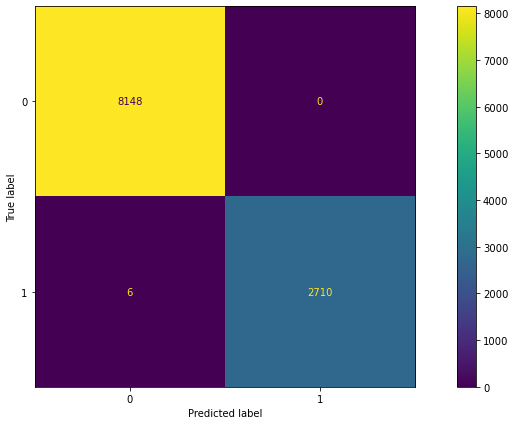

In [51]:
cm = confusion_matrix(y, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()